In [37]:
#Python package. Ananlysis of Mobile price using KNN Algorithm.
#Importing required libraries.
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#importing the train data set
trainDS=pd.read_csv("train.csv")
trainDS

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [39]:
#printing the dataset information
trainDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [40]:
#printing more information about dataset
trainDS.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

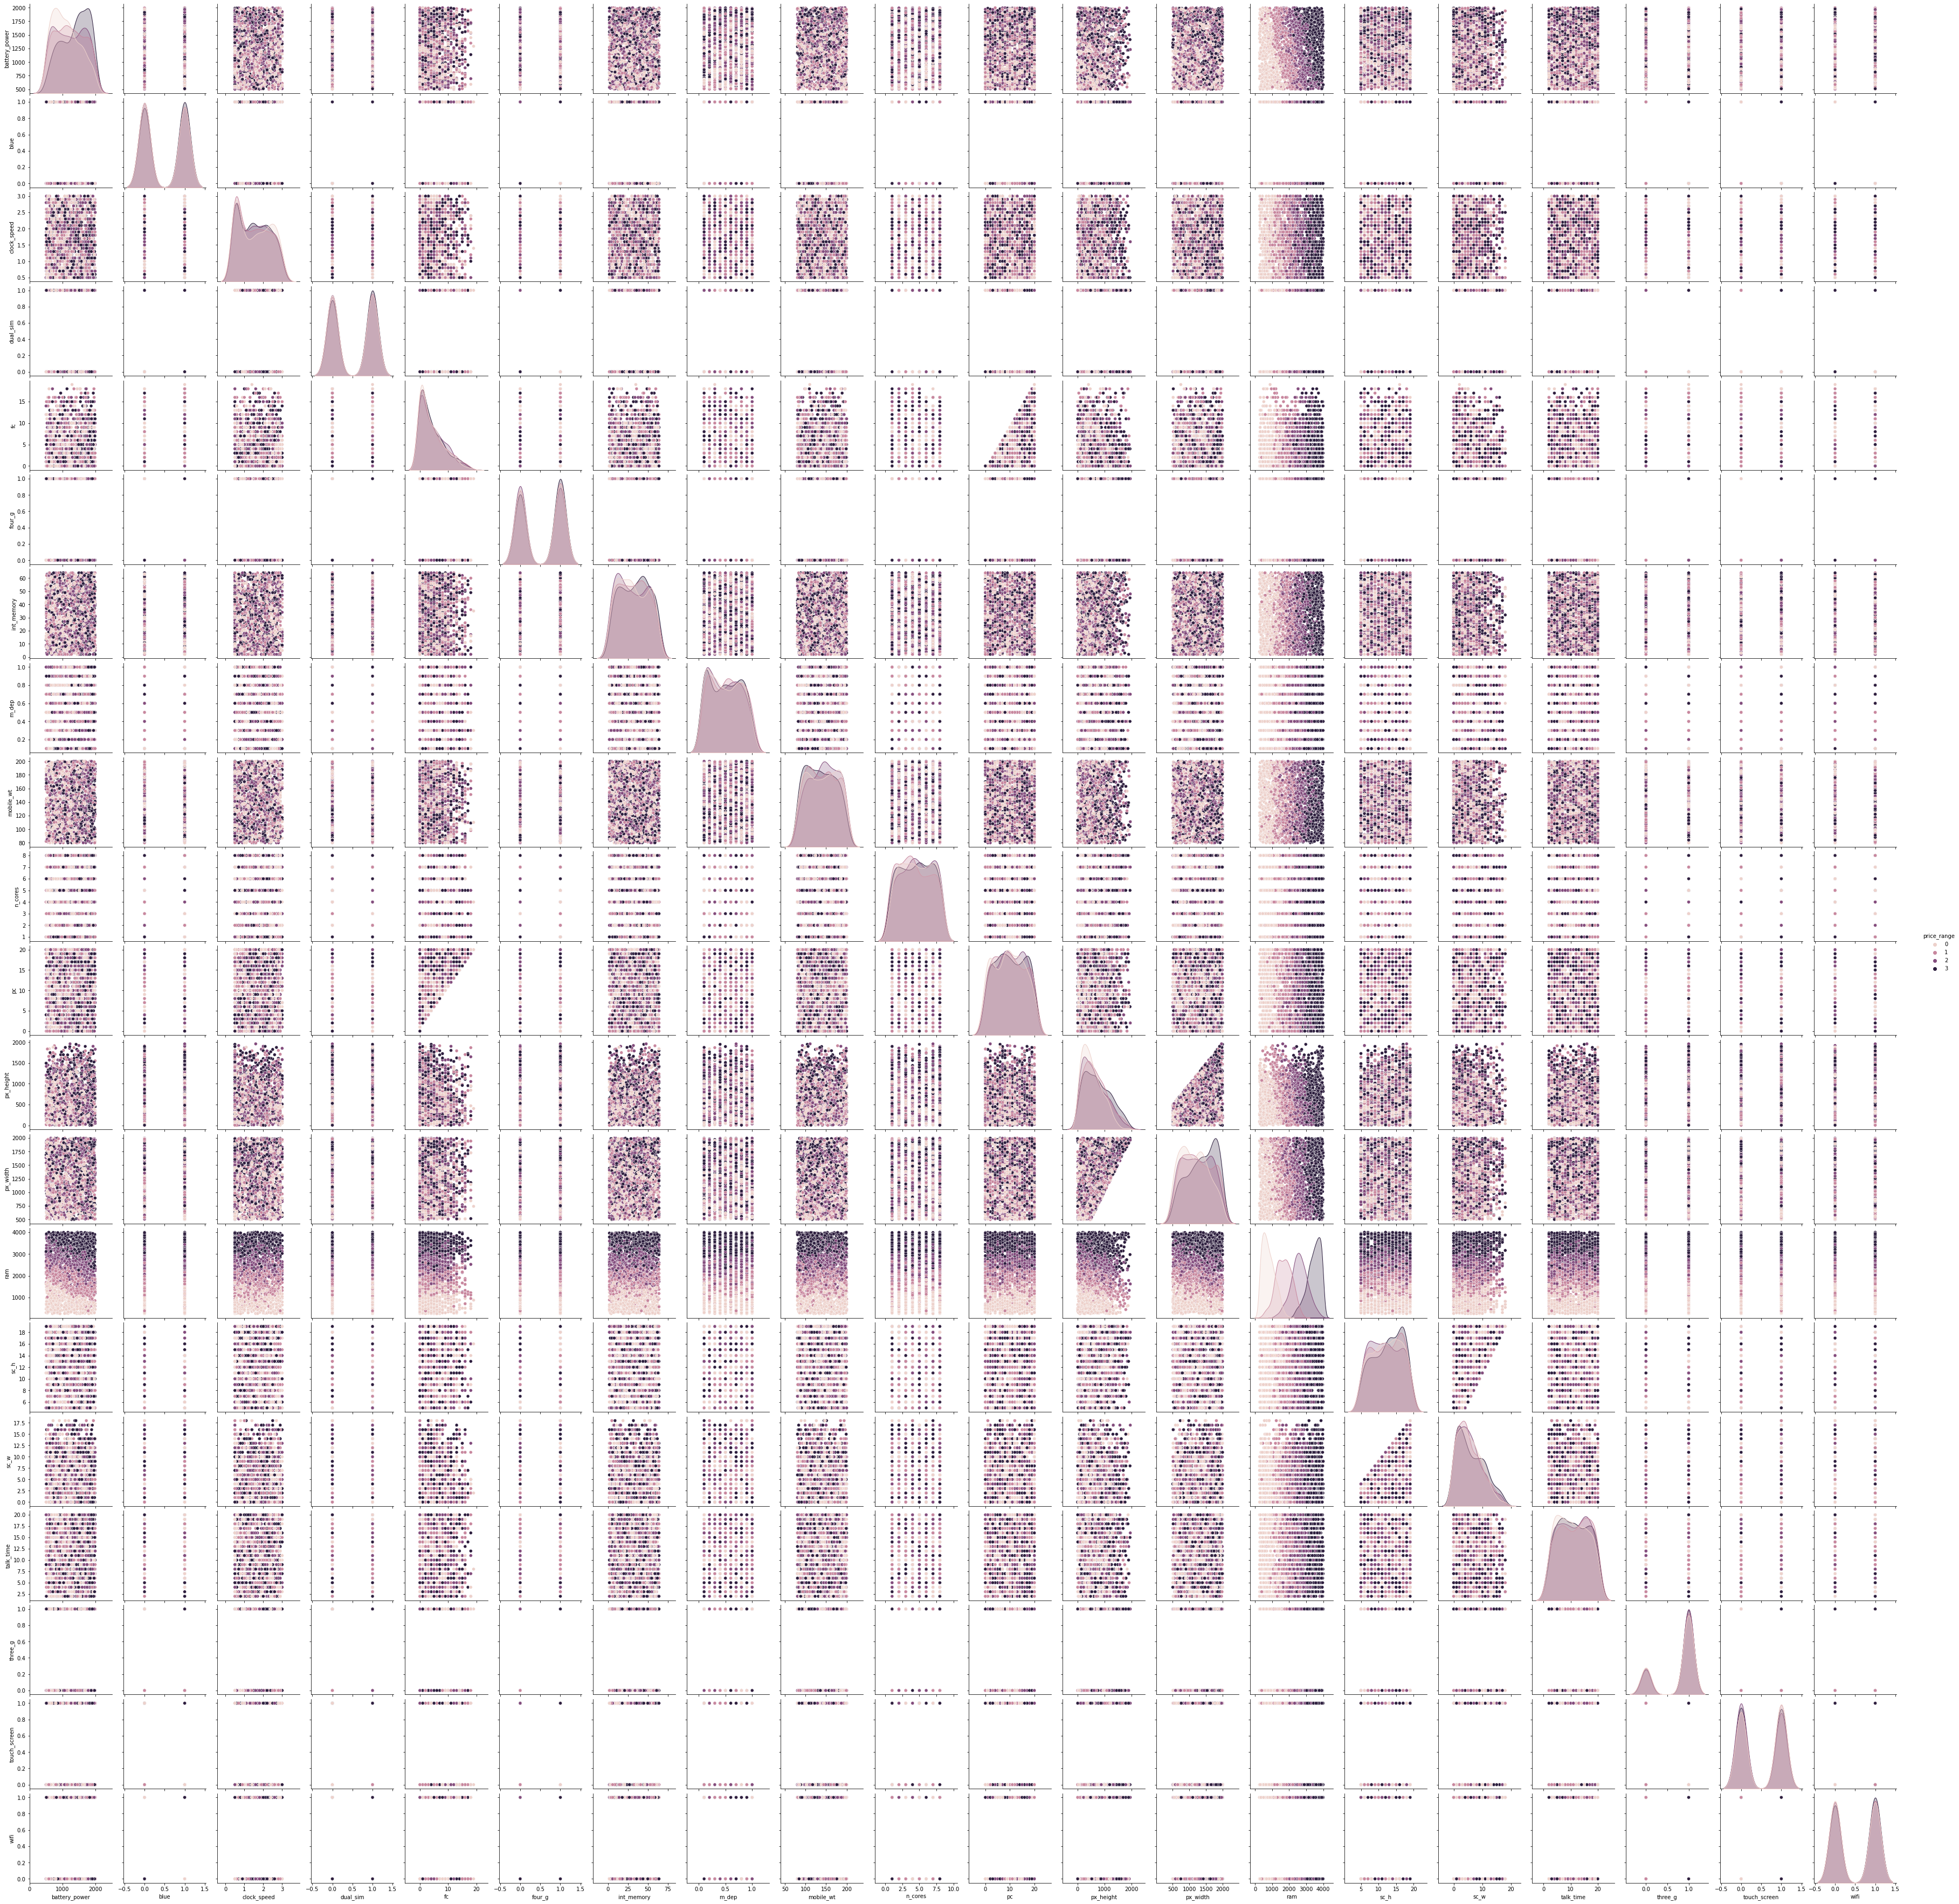

In [55]:
#A Scatter plot of initial data- a pairwise relationship between all data in the dataset
sns.pairplot(trainDS,hue='price_range')

<AxesSubplot:>

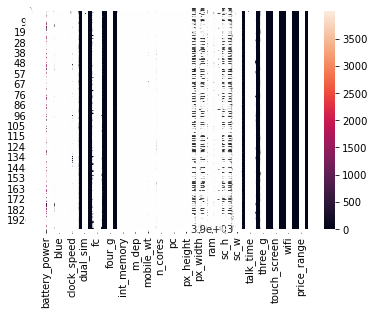

In [83]:
sns.heatmap(trainDS,annot=True)

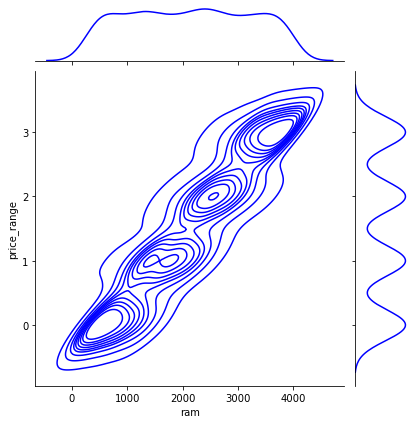

In [41]:
#Relationship between RAM and price
sns.jointplot(x='ram',y='price_range',data=trainDS,color='blue',kind='kde')

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

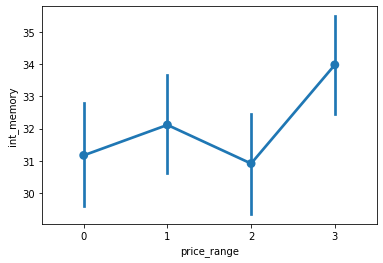

In [42]:
#Relationship between internal memory and price
sns.pointplot(y="int_memory", x="price_range", data=trainDS)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

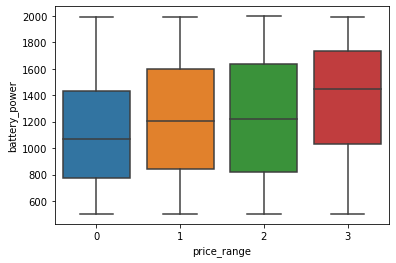

In [43]:
#Relationship between battery power and Price
sns.boxplot(x="price_range", y="battery_power", data=trainDS)

In [23]:
#Spliting the data into feature vector(X-axis) and target variable(Y-axis)
#Feature vector:All attributes which are used to describe an object
#Target vector:The value which we must find to solve the problem
X=trainDS.drop('price_range',axis=1)
Y=trainDS['price_range']
print(X)
print(Y)


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [44]:
#diving the dataset into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [45]:
#Analysis using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
#Returning the accuracy of the model
knn.score(x_test,y_test)

0.95

Text(0, 0.5, 'Error Rate')

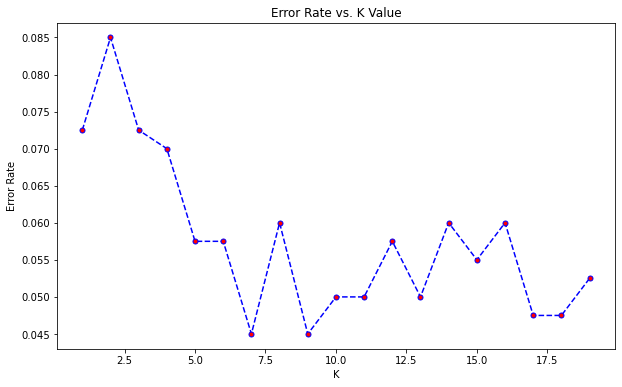

In [47]:
#Trying to get the optimum value of k using elbow method.
#Elbow method:select the value of k at the “elbow” ie the point after which the graph start decreasing 
#in a linear fashion
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
#Getting all the predicted price in KNN algorithm
y_pred = knn.predict(x_test)

In [50]:
#Printing the difference between the predicted price and actual price
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.93      0.96      0.94        91
           2       0.90      0.92      0.91        92
           3       0.98      0.93      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



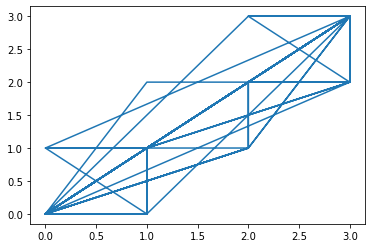

In [51]:
#Plotting the values of price which is predicted and the actual price
plt.plot(y_test,y_pred)

In [52]:
#Creating a confusion matrix
#Confusion matrix:a matrix used to determine the performance of the classification models 
#for a given set of test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[103,   2,   0,   0],
       [  3,  87,   1,   0],
       [  0,   5,  85,   2],
       [  0,   0,   8, 104]])

<AxesSubplot:>

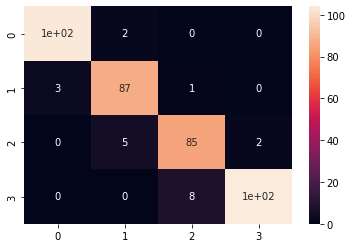

In [53]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True)

In [54]:
#Calculating the mean absolute model and accuracy of the model
from sklearn.metrics import mean_absolute_error, accuracy_score
mse = mean_absolute_error(y_test, y_pred)
print(mse)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

0.0525
ACCURACY OF THE MODEL:  0.9475


In [59]:
#Finding the most bought amount of RAM
ram=trainDS['ram']
ram


0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [64]:
modeRam=ram.mode()
modeRam

0    1229
1    1464
2    2227
3    2610
4    3142
Name: ram, dtype: int64

In [68]:
requiredData=trainDS[trainDS["ram"]==modeRam[0]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
713            1108     1          1.3         1  14       1           2   
1009           1881     0          2.2         0   4       0          51   
1037           1104     0          1.7         0   1       1          60   
1081            530     1          2.6         0   1       0          40   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
713     0.3        169        7  ...        208      1742  1229     5     3   
1009    0.3        158        5  ...        477      1553  1229    12     0   
1037    0.4        199        2  ...        653      1413  1229     6     0   
1081    0.9        118        6  ...        818      1090  1229    16    11   

      talk_time  three_g  touch_screen  wifi  price_range  
713           4        1             1     0            0  
1009         14        1             0     0            1  
1037          3        1             1     1            0  
1081          2        0             1     0            0  

[4 rows x 21 columns]

In [69]:
requiredData=trainDS[trainDS["ram"]==modeRam[1]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
954             922     1          0.7         0   0       1          47   
1243           1180     1          1.2         0   5       1          50   
1355           1321     1          1.3         0   0       1          63   
1375           1604     1          1.9         1   0       1          63   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
954     1.0        157        8  ...       1295      1808  1464    17     4   
1243    1.0        144        4  ...        925      1252  1464     7     3   
1355    0.4        109        8  ...        817       941  1464     7     6   
1375    0.6         93        5  ...        641      1156  1464    15     9   

      talk_time  three_g  touch_screen  wifi  price_range  
954          12        1             0     1            1  
1243         20        1             1     1            1  
1355         16        1             1     1            1  
1375         20        1             1     0            1  

[4 rows x 21 columns]

In [70]:
requiredData=trainDS[trainDS["ram"]==modeRam[2]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
32             1319     1          0.9         0   3       1          41   
195            1526     0          2.1         0   1       1          23   
233            1442     0          1.0         1   0       0          27   
1136            564     0          3.0         1   1       0           8   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
32      0.9        107        1  ...         85      1152  2227    18     5   
195     0.2        117        7  ...        718       751  2227    18    10   
233     0.1        192        3  ...        231       687  2227     6     5   
1136    0.7        130        2  ...        853      1737  2227     9     2   

      talk_time  three_g  touch_screen  wifi  price_range  
32            3        1             1     1            1  
195           3        1             1     0            2  
233          20        1             1     0            1  
1136         14        1             0     1            1  

[4 rows x 21 columns]

In [71]:
requiredData=trainDS[trainDS["ram"]==modeRam[3]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
460            1742     0          2.3         1   9       1          43   
507             512     1          0.5         1   7       0          15   
1380           1811     0          2.9         0   0       0          33   
1887           1719     1          2.1         1   0       0          52   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
460     0.4        170        7  ...        453       681  2610    12     3   
507     0.9         83        3  ...        249      1849  2610    18    14   
1380    0.2        132        8  ...       1099      1553  2610     8     3   
1887    0.1        187        3  ...        417       520  2610    10     1   

      talk_time  three_g  touch_screen  wifi  price_range  
460          10        1             0     1            2  
507          15        0             1     1            2  
1380         13        1             1     0            3  
1887         11        1             1     1            2  

[4 rows x 21 columns]

In [72]:
requiredData=trainDS[trainDS["ram"]==modeRam[4]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
978            1359     0          0.6         0   4       0          59   
1291           1278     1          1.2         0  10       1          60   
1479           1806     1          2.0         1   2       1          54   
1985           1829     1          2.1         0   8       0          59   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
978     0.3         86        2  ...       1692      1902  3142    19     3   
1291    0.6        172        7  ...       1244      1504  3142    11     4   
1479    0.1        117        1  ...        347       727  3142    13     0   
1985    0.1         91        5  ...       1457      1919  3142    16     6   

      talk_time  three_g  touch_screen  wifi  price_range  
978          17        0             1     1            3  
1291         19        1             0     1            3  
1479          6        1             0     1            3  
1985          5        1             1     1            3  

[4 rows x 21 columns]

In [74]:
battery_power=trainDS["battery_power"]
modeBattery=battery_power.mode()
modeBattery

0     618
1    1589
2    1872
Name: battery_power, dtype: int64

In [75]:
requiredData=trainDS[trainDS["battery_power"]==modeBattery[0]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
344             618     0          2.1         0   2       0           6   
1118            618     1          2.2         1   0       1          63   
1127            618     0          0.6         0   8       0          16   
1172            618     1          0.5         1   2       1          57   
1747            618     0          1.1         0  11       1          45   
1987            618     1          1.0         0   9       1          13   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
344     0.3         86        1  ...       1314      1688  1051    13    10   
1118    0.9        138        2  ...        853      1781  2574    14     3   
1127    0.2        143        1  ...       1105      1602  2262    16    15   
1172    0.2         88        3  ...        879       896  2399    18    15   
1747    0.2        188        3  ...       1175      1586  2339    19     2   
1987    0.1         80        4  ...        591       724  1424    15    12   

      talk_time  three_g  touch_screen  wifi  price_range  
344          15        0             0     1            0  
1118          5        1             1     0            2  
1127          4        0             1     0            2  
1172         17        1             1     1            1  
1747         10        1             1     0            2  
1987          7        1             1     0            0  

[6 rows x 21 columns]

In [76]:
requiredData=trainDS[trainDS["battery_power"]==modeBattery[1]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
80             1589     1          0.6         1   0       1          58   
448            1589     0          2.5         0   5       1          51   
479            1589     1          2.2         1   2       0          58   
525            1589     1          1.4         0   3       1          26   
939            1589     0          2.6         0   9       0          46   
1957           1589     0          0.6         0   0       0           5   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
80      0.9         85        7  ...        319      1206  3464    19    10   
448     0.8        195        1  ...        810      1743  2612     8     2   
479     0.1        128        4  ...        957      1911  3961    16    14   
525     0.1        100        8  ...       1673      1759  3970    16     8   
939     0.4         84        3  ...        618       940  2373    11     9   
1957    0.8        112        5  ...        776      1397  3430     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
80            6        1             1     1            3  
448          16        1             0     0            2  
479          14        1             0     1            3  
525          18        1             0     1            3  
939          20        1             1     0            2  
1957         19        1             1     1            3  

[6 rows x 21 columns]

In [78]:
requiredData=trainDS[trainDS["battery_power"]==modeBattery[2]]
requiredData

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
509            1872     1          2.3         0   6       0          44   
766            1872     1          0.9         1   0       0          16   
1064           1872     0          0.5         1   3       0          17   
1258           1872     1          0.5         1  14       0          49   
1560           1872     0          0.5         0   5       1          26   
1910           1872     1          1.9         0   5       0          35   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
509     0.7        134        3  ...        459      1259  1955     9     4   
766     0.5         80        2  ...        286      1484  2295    15    11   
1064    0.7         89        6  ...       1749      1767   724    17     3   
1258    0.2        139        7  ...         81      1389  3153    16    15   
1560    0.5        172        4  ...        672      1088  2273     8     4   
1910    0.6        111        3  ...       1546      1879  2419    15     5   

      talk_time  three_g  touch_screen  wifi  price_range  
509          15        1             0     1            2  
766          16        0             0     1            2  
1064          9        1             0     1            1  
1258          5        1             1     0            3  
1560          8        1             0     1            2  
1910         19        0             0     0            3  

[6 rows x 21 columns]